###Preparing the tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from pandas.plotting import scatter_matrix

###Loading the data and Exploratory Data Analysis


In [2]:
rm = pd.read_csv("/content/drive/MyDrive/ML Task/Resume/Resume.csv")
rm[:5]

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
rm.shape

(2484, 4)

In [4]:
#Since we won't be using the ID and Resume_html columns, we are going to drop them
rm.drop(columns=["ID","Resume_html"], inplace=True)
# new_colms = ["Category","Resume_str"]
# rm = rm[new_colms]
rm[:5]

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [5]:
category = rm["Category"].value_counts().reset_index()
category

,index,Category
0,INFORMATION-TECHNOLOGY,120
1,BUSINESS-DEVELOPMENT,120
2,FINANCE,118
3,ADVOCATE,118
4,ACCOUNTANT,118
5,ENGINEERING,118
6,CHEF,118
7,AVIATION,117
8,FITNESS,117
9,SALES,116


In [6]:
#Exploring the resume data
rm["Resume_str"][1]

"         HR SPECIALIST, US HR OPERATIONS       Summary     Versatile  media professional with background in Communications, Marketing, Human Resources and Technology.\xa0        Experience     09/2015   to   Current     HR Specialist, US HR Operations    Company Name   －   City  ,   State       Managed communication regarding launch of Operations group, policy changes and system outages      Designed standard work and job aids to create comprehensive training program for new employees and contractors         Audited job postings for old, pending, on-hold and draft positions.           Audited union hourly, non-union hourly and salary background checks and drug screens             Conducted monthly new hire benefits briefing to new employees across all business units               Served as a link between HR Managers and vendors by handling questions and resolving system-related issues         Provide real-time process improvement feedback on key metrics and initiatives  Successfully r

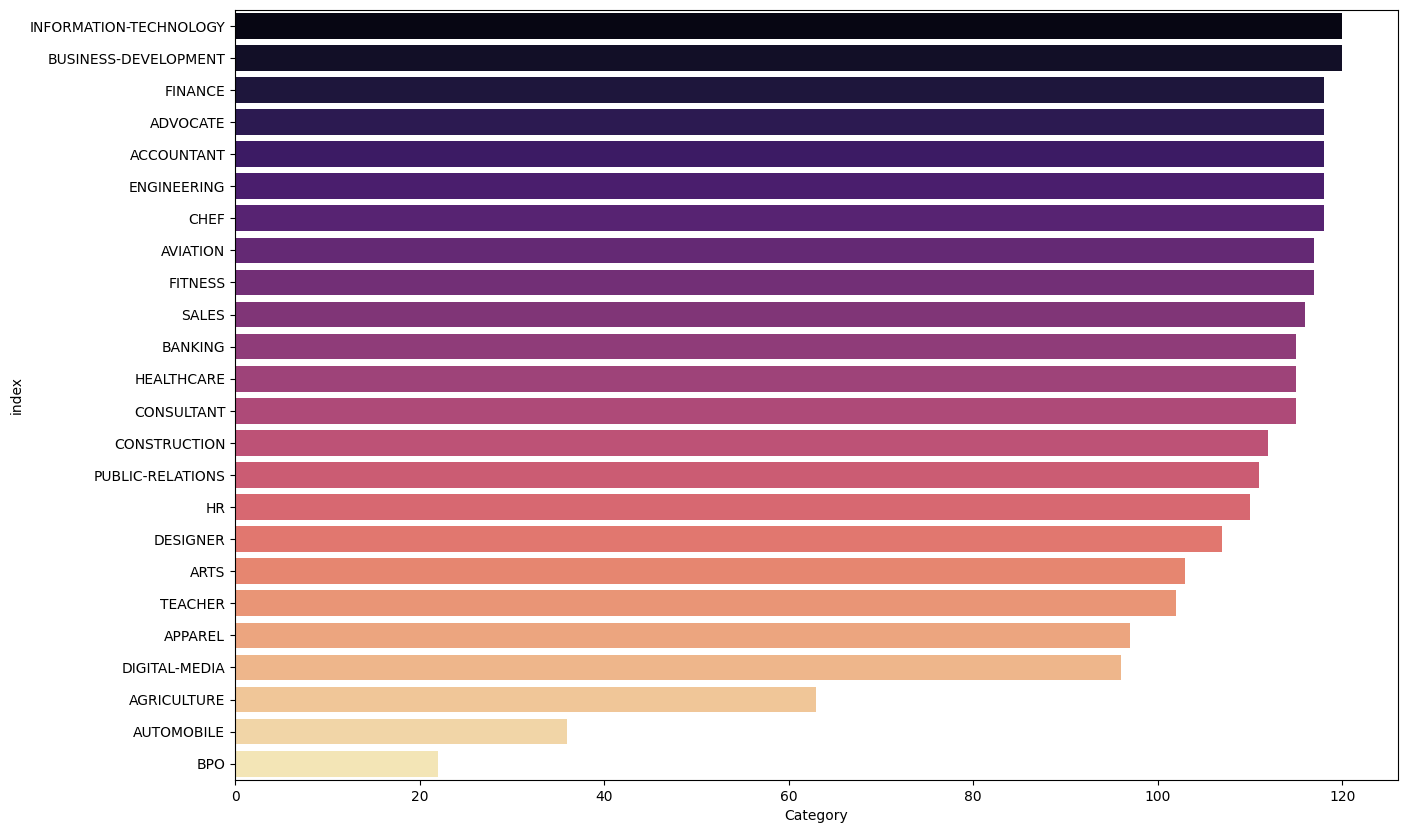

In [7]:
#Visualizing the bar plot to see which category has the most values
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(x=category["Category"], y =category["index"], palette="magma")
plt.show()

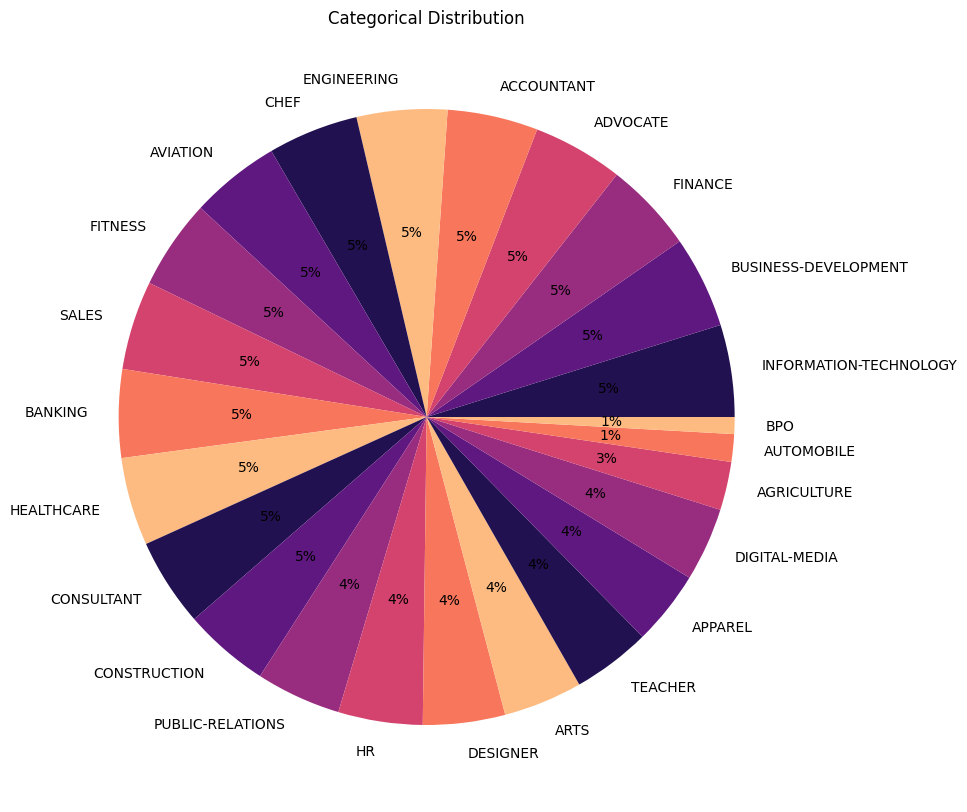

In [8]:
#Plotting a pie chart to show the category distribution
plt.figure(figsize=(15,10))
plt.pie(category["Category"], labels=category["index"],
        colors=sns.color_palette("magma"),autopct='%.0f%%')
plt.title("Categorical Distribution")
plt.show()

###Data Preprocessing
1. Data Cleaning
2. Data Encoding

In [9]:
#Removing URLs, hashtags, mentions, special letters, and punctuations using RegEx expression
import re
def cleanResume(resumeText):
    resumeText = resumeText.lower()
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText


In [10]:
cleanResume("My github link is ## https://github.com/sks199?tab=repositories $$, and i predominantly work in python ")

'my github link is and i predominantly work in python '

In [11]:
rm["Cleaned"] = rm["Resume_str"].apply(lambda x:cleanResume(x))
rm.head()


,Resume_str,Category,Cleaned
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admin...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versat...
2,HR DIRECTOR Summary Over 2...,HR,hr director summary over 20 years experience ...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dy...
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depa...


In [12]:
rm["Cleaned"][1]

' hr specialist us hr operations summary versatile media professional with background in communications marketing human resources and technology experience 09 2015 to current hr specialist us hr operations company name city state managed communication regarding launch of operations group policy changes and system outages designed standard work and job aids to create comprehensive training program for new employees and contractors audited job postings for old pending on hold and draft positions audited union hourly non union hourly and salary background checks and drug screens conducted monthly new hire benefits briefing to new employees across all business units served as a link between hr managers and vendors by handling questions and resolving system related issues provide real time process improvement feedback on key metrics and initiatives su essfully re branded us hr operations sharepoint site business unit project manager for rfi rfp on background check and drug screen vendor 01 

In [13]:
#getting the entire resume text
corpus=" "
for i in range(0,len(rm)):
    corpus= corpus + rm["Cleaned"][i]

In [14]:
#Removing stopwords and conjunctions
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

2047204

In [16]:
#Converting to lowecase for uniformity of data
words = []
for word in tokens:
    words.append(word.lower())
words[0:7]


['hr',
 'administrator',
 'marketing',
 'associate',
 'hr',
 'administrator',
 'summary']

In [17]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
rm['New_Category'] = label.fit_transform(rm['Category'])
rm.head()

,Resume_str,Category,Cleaned,New_Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admin...,19
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versat...,19
2,HR DIRECTOR Summary Over 2...,HR,hr director summary over 20 years experience ...,19
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dy...,19
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depa...,19


In [18]:
rm.New_Category.unique()

array([19, 13, 20, 23,  1,  9, 18, 17,  2,  8, 22, 12, 14,  5, 10, 16,  3,
       15,  0, 11, 21,  7,  4,  6])

In [19]:
rm.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

(array([299., 200., 153., 257., 230., 222., 332., 232., 230., 329.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

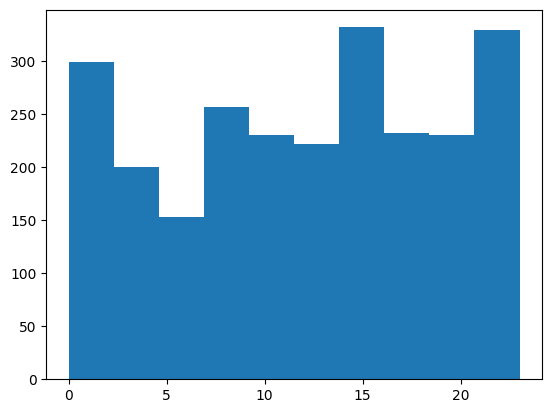

In [20]:
plt.hist(rm["New_Category"])

In [21]:
# Vectorizing the cleaned columns

from sklearn.feature_extraction.text import TfidfVectorizer
text = rm['Cleaned'].values
target = rm['New_Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features = 22000
    )
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [22]:
WordFeatures.shape

(2484, 22000)

###Training and Testing the Model

In [23]:
#Seperating into train and test split. Here I am splitting the train and test data into a 80/20 split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1987, 22000), (497, 22000), (1987,), (497,))

In [25]:
#Importing the models
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#Training the model
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(x_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [27]:
# # Prediction
# y_pred = model.predict(x_test)

In [28]:
print(f'---------------------------------\n| Training Accuracy   :- {(model.score(x_train, y_train)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {(model.score(x_test, y_test)*100).round(2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy   :- 66.33% |
---------------------------------
| Validation Accuracy :- 53.72% |
---------------------------------


In [29]:
# Initialize and train the Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(x_train, y_train)

MultinomialNB()

In [30]:
# Prediction
y2_pred = model2.predict(x_test)

In [31]:
print(f'---------------------------------\n| Training Accuracy   :- {(model2.score(x_train, y_train)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {(model2.score(x_test, y_test)*100).round(2)}% |\n------------')

---------------------------------
| Training Accuracy   :- 70.91% |
---------------------------------
| Validation Accuracy :- 49.3% |
------------


In [33]:
import pickle
pickle.dump(word_vectorizer,open('/content/drive/MyDrive/ML Task/saved_model/word_vectorizer.pkl','wb'))
pickle.dump(model2, open('/content/drive/MyDrive/ML Task/saved_model/model2.pkl', 'wb'))

In [37]:
from sklearn import metrics
print("model report: %s: \n %s\n" % (model2, metrics.classification_report(y_test, y2_pred)))

model report: MultinomialNB(): 
               precision    recall  f1-score   support

           0       0.61      0.96      0.75        26
           1       0.23      0.26      0.24        23
           2       0.00      0.00      0.00        10
           3       0.67      0.17      0.27        12
           4       1.00      0.04      0.08        25
           5       0.00      0.00      0.00         8
           6       0.64      0.56      0.60        25
           7       0.59      0.59      0.59        22
           8       0.00      0.00      0.00         3
           9       0.32      0.58      0.41        26
          10       0.68      0.54      0.60        24
          11       0.64      0.73      0.68        22
          12       0.00      0.00      0.00        29
          13       0.75      0.64      0.69        14
          14       1.00      0.18      0.31        22
          15       0.65      0.52      0.58        29
          16       0.40      0.35      0.37     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
